# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [5]:
dataframe = pd.read_excel(r"C:\Users\almal\Downloads\stc TV Data Set_T2 .xlsx",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset

In [7]:
# check the data shape
dataframe.shape

(86, 2)

In [9]:
# display the first 5 rows 
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [11]:
# display the dataset after applying data types
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [13]:
# describe the numeric values in the dataset
dataframe.describe()

,date_,Total_watch_time_in_houres
count,86,86.000000
mean,2018-02-28 17:01:23.720930304,780.817926
min,2018-01-01 00:00:00,562.124722
25%,2018-01-30 06:00:00,707.709653
50%,2018-02-28 12:00:00,763.181389
75%,2018-03-29 18:00:00,840.985278
max,2018-04-30 00:00:00,1123.551944
std,NaN,122.992002


In [15]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [17]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [19]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [21]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


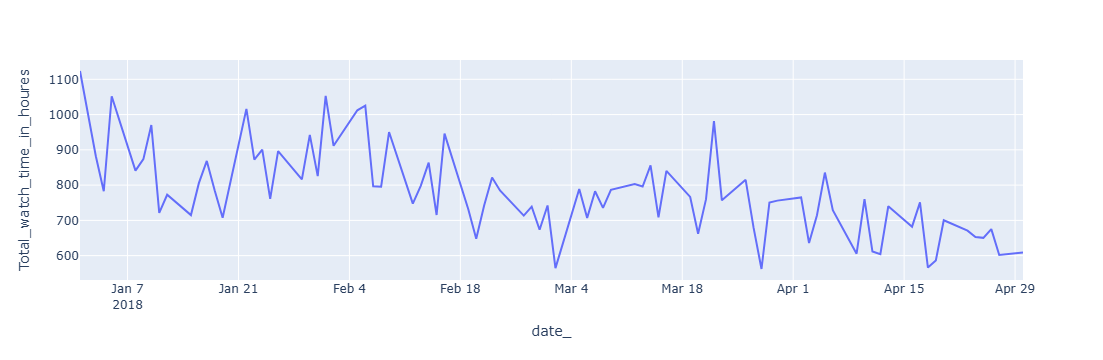

In [65]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

In [25]:
df=dataframe.copy()

In [13]:
"""
TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results
"""

'\nTODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months\nHint: you can build a forecast model to predict the results\n'

In [45]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
# Split into train and test
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [49]:
# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\almal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\almal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\almal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



In [51]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

In [53]:
# Evaluate
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6728.514481673261


In [55]:
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 70.99677053927887


In [59]:
r_squared = r2_score(test, forecast)
print(f'R-squared (R²): {r_squared}')

R-squared (R²): -0.34083866359863335


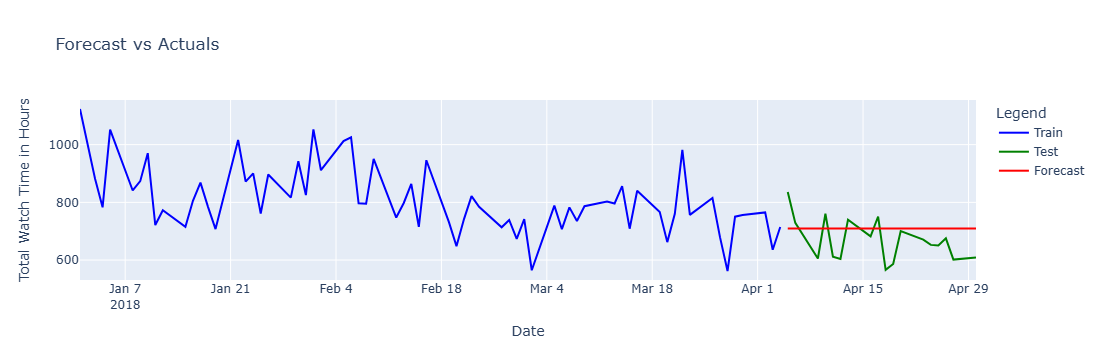

In [67]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train['Total_watch_time_in_houres'], mode='lines', name='Train', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test.index, y=test['Total_watch_time_in_houres'], mode='lines', name='Test', line=dict(color='green')))
forecast_index = test.index
fig.add_trace(go.Scatter(x=forecast_index, y=forecast, mode='lines', name='Forecast', line=dict(color='red')))

fig.update_layout(title='Forecast vs Actuals',
                  xaxis_title='Date',
                  yaxis_title='Total Watch Time in Hours',
                  legend_title='Legend')
fig.show()